# Import Data

In [1]:
import numpy as np
np.random.seed(1248)
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/buffer_overflow_data.csv.gz')

In [4]:
labels = data.copy()
del labels['Unnamed: 0']
del labels['Unnamed: 0.1']
del labels['filename']
del labels['code']
del labels['flaw']
del labels['flaw_loc']
labels = labels.drop_duplicates().sort_values('testcase_ID').reset_index(drop=True)

In [5]:
x = pd.read_csv("../data/buffer_overflow_graph_embeddings.csv.gz")
x['testcase_ID'] = x['type']
del x['type']
x = x.sort_values("testcase_ID").reset_index(drop=True)

In [6]:
y = labels['bug']
x = x.drop('testcase_ID', axis='columns')

In [7]:
import pickle

with open('../data/x-train-binary','rb') as f:
    x_train = pickle.load(f)
    
with open('../data/y-train-binary','rb') as f:
    y_train = pickle.load(f)
    
with open('../data/x-test-binary','rb') as f:
    x_test = pickle.load(f)
    
with open('../data/y-test-binary','rb') as f:
    y_test = pickle.load(f)

In [10]:
y_train.shape

(17201,)

In [11]:
x_train.shape

(17201, 128)

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [10]:
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, Conv2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop, Adadelta, Adam


In [13]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 33,153
Trainable params: 33,153
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
10751/10751 [==============================] - 1s 75us/step - loss: 0.6930 - acc: 0.5175
Epoch 2/50
10751/10751 [==============================] - 0s 46us/step - loss: 0.6822 - acc: 0.5573
Epoch 3/50
10751/10751 [==============================] - 1s 86us/step - loss: 0.6670 - acc: 0.5948
Epoch 4/50
10751/10751 [==============================] - 1s 116us/step - loss: 0.6442 - acc: 0.6386
Epoch 5/50
10751/10751 [==============================] - 1s 51us/step - loss: 0.6227 - acc: 0.6673
Epoch 6/50
10751/10751 [==============================] - 1s 73us/step - loss: 0.6053 - acc: 0.6792
Epoch 7/50
10751/10751 [==============================] - 1s 75us/step - loss: 0.5949 - acc: 0.6888
Epoch 8/50
10751/10751 [==============================] - 1s 82us/step - loss: 0.5753 - acc: 0.7086
Epoch 9/50
10751/10751 [==============================] - 1s 76us/step - loss: 0.5553 - acc: 0.7295
Epoch 10/50
10751/10751 [==========================

In [20]:
# import pickle

In [21]:

# with open('../data/baseline-model-binary','wb') as f:
#     pickle.dump(model,f)

In [16]:
model.evaluate(x_test,y_test)

10751/10751 [==============================] - 1s 47us/step


[0.13794717388287353, 0.9360989675379034]

In [26]:
!pip install seaborn

In [17]:
import seaborn as sns
from sklearn import metrics
import matplotlib

In [18]:
y_predict= model.predict(x_test)

In [19]:
import numpy as np

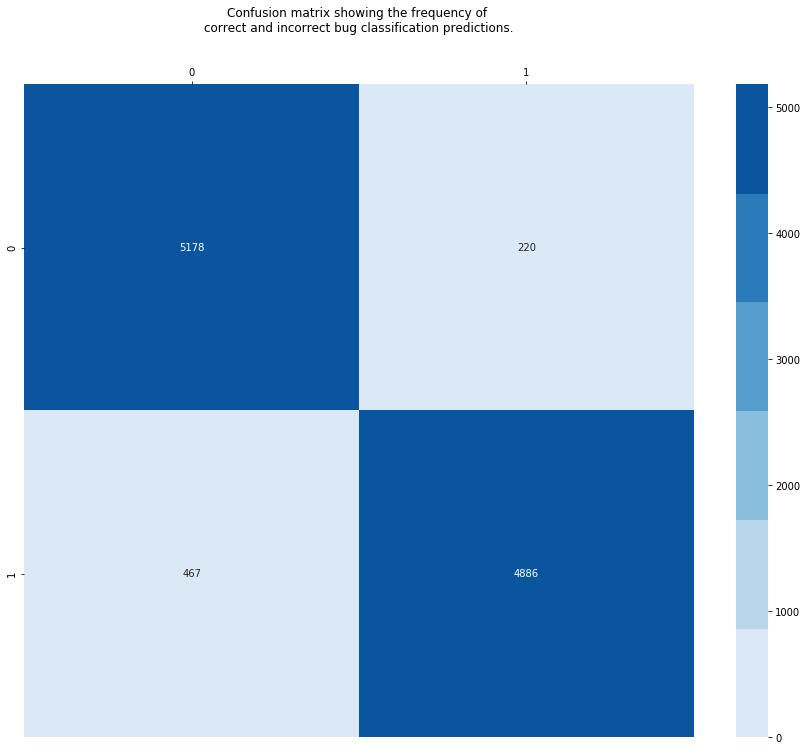

In [20]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_predict)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(15, 12)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [21]:
confusion_matrices = metrics.multilabel_confusion_matrix(
    (y_test+0).values,
    np.rint(y_predict)
)

In [22]:
# need to sort out the below

for label, confusion_matrix in zip(y_test.columns, confusion_matrices):

    confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
    confusion_figure.set_size_inches(2, 1)
    confusion_axes.set_title(
        label + 
        '\n'  # hack to avoid overlap with x-axis labels below
    )
    confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
    _ = sns.heatmap(
        confusion_matrix,
        annot=True,
        fmt="d",
        cmap=sns.color_palette("Blues"),
        vmin=0,
        ax=confusion_axes,
    )

AttributeError: 'Series' object has no attribute 'columns'

In [23]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve((y_test.values+0).argmax(axis=1)-5, y_predict.argmax(axis=1)-5)

AxisError: axis 1 is out of bounds for array of dimension 1

In [44]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
auc_keras = auc(fpr_keras, tpr_keras)

NameError: name 'fpr_keras' is not defined

In [ ]:
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(10, 8)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [72]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
rf.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.4053359315636961

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf1.fit(x_train, y_train)

In [ ]:
rf1.score(x_test, y_test)

In [2]:
from pyspark import SparkContext
import os 

# this should be JAVA_HOME path
os.environ['JAVA_HOME']="/Library/Java/JavaVirtualMachines/jdk1.8.0_202.jdk/Contents/Home/"

os.environ['PYSPARK_SUBMIT_ARGS'] = "--master local[2] pyspark-shell"

sc = SparkContext.getOrCreate()

In [13]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("test").getOrCreate()

In [16]:
xtemp = x_test.values.tolist()

In [32]:
temp = pd.DataFrame()

In [29]:
df = spark.createDataFrame()

TypeError: createDataFrame() missing 1 required positional argument: 'data'

In [1]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'result', labelCol = 'categorylabel')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('label', 'prediction', 'probability').show(10)

AttributeError: Cannot load _jvm from SparkContext. Is SparkContext initialized?

In [ ]:
from pyspark.ml.classification import LogisticRegression
train, test = indexed.randomSplit([0.8, 0.2], seed = 7*4*25)


# Try Convolutional Neural Network

In [11]:
from keras.layers import RepeatVector, Permute, Lambda, ActivityRegularization, AveragePooling1D
from keras.optimizers import Nadam, Adagrad
import math

In [12]:
n_timesteps, n_features, n_outputs = x_train.shape[0], x_train.shape[1], y_train.shape[0]

In [13]:
n_timesteps, n_features, n_outputs

(17201, 128, 17201)

In [14]:
x_train.shape

(17201, 128)

### The functions below can be used as Neural Network layers if we want.

In [15]:
#What is K?

def antirectifier(x):
    x -= K.mean(x, axis=1, keepdims=True)
    x = K.l2_normalize(x, axis=1)
    pos = K.relu(x)
    neg = K.relu(-x)
    return K.concatenate([pos, neg], axis=1)

def antirectifier_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 2  # only valid for 2D tensors
    shape[-1] *= 2
    return tuple(shape)

#conv_model.add(Lambda(antirectifier,output_shape=antirectifier_output_shape))


def hadamard_product_sum(tensors):
    out1 = tensors[0] * tensors[1]
    out2 = K.sum(out1, axis=-1)
    return [out1, out2]

def hadamard_product_sum_output_shape(input_shapes):
    shape1 = list(input_shapes[0])
    shape2 = list(input_shapes[1])
    assert shape1 == shape2  # else hadamard product isn't possible
    return [tuple(shape1), tuple(shape2[:-1])]

#conv_model(Lambda(hadamard_product_sum, hadamard_product_sum_output_shape))

In [21]:
x_train.shape[1]

128

Because our input is not the right dimension to go straight into a neural network, it makes sense to start with a dense layer that our data can be inputted into with ease. In order to get the data into the right dimensions the RepeatVector function is used. Reshape would have been ideal but the NN did not like this and would always error. Using Repeat Vector may not keep the proper structure we want.
A 1D convolutional layer is added. This moves along one axis as it convolutes. Strides is how far it moves each time and to just move one step yielded the best results. Sigmoid worked best as an activation because it is a logistic function so works well for our binary data. I have then used the dropout function to lower our chance of overfitting. It sets, at rate 0.5, input units to 0 at each update during training time. Then we pool using padding as 'same' so everything is padded to the same length here. Then flattening it back to 2 dimensions.
Adding in squaring everything helped for predictions as values close to 1 got closer and those close to 0 got closer. Then from tutorials it always seemed a good idea to finish with dense.

In [16]:
conv_model = Sequential()

conv_model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
conv_model.add(RepeatVector(3))


# conv_model.add(Lambda(lambda x: x ** 3))

# conv_model.add(Permute(2,1))

conv_model.add(Conv1D(filters = 64, kernel_size = 3, strides = 1, activation ='sigmoid'))
conv_model.add(Dropout(0.5))
conv_model.add(MaxPooling1D(pool_size = 2, padding = 'same'))
# conv_model.add(Conv1D(filters = 64, kernel_size = 3, activation ='linear'))
# conv_model.add(LeakyReLU(alpha=0.1))
# conv_model.add(MaxPooling1D(pool_size = 2, padding = 'same'))
conv_model.add(Flatten())

conv_model.add(Lambda(lambda x: x**2))

conv_model.add(Dense(128, activation='sigmoid'))
# conv_model.add(LeakyReLU(alpha=0.1))
conv_model.add(Dropout(0.05))

conv_model.add(Dense(units=1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             24640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 64)                0         
__________

In [18]:
conv_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
conv_model.fit(x_train, y_train, epochs=50, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
17201/17201 [==============================] - 3s 155us/step - loss: 0.6925 - acc: 0.5224
Epoch 2/50
17201/17201 [==============================] - 2s 92us/step - loss: 0.6319 - acc: 0.6404: 4s - 
Epoch 3/50
17201/17201 [==============================] - 2s 98us/step - loss: 0.5416 - acc: 0.7233
Epoch 4/50
17201/17201 [==============================] - 2s 112us/step - loss: 0.4763 - acc: 0.7651
Epoch 5/50
17201/17201 [==============================] - 2s 135us/step - loss: 0.4010 - acc: 0.8084
Epoch 6/50
17201/17201 [==============================] - 2s 120us/step - loss: 0.3260 - acc: 0.8466
Epoch 7/50
17201/17201 [==============================] - 2s 108us/step - loss: 0.2585 - acc: 0.8805
Epoch 8/50
17201/17201 [==============================] - 1s 79us/step - loss: 0.2217 - acc: 0.8969
Epoch 9/50
17201/17201 [==============================] - 1s 87us/step - loss: 0.1956 - acc: 0.9090
Epoch 10/50
17201/17201 [===============

In [19]:
conv_model.evaluate(x_test,y_test)

4301/4301 [==============================] - 0s 97us/step


[0.10377816064424, 0.9479190885840503]

In [20]:
import pickle

with open('../data/binary-convolutional','wb') as f:
    pickle.dump(conv_model,f)

# Try Different 2D Network

In [34]:
model_2d = Sequential()
model_2d.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model_2d.add(Dropout(rate = 0.05))
model_2d.add(Dense(units=1, activation='sigmoid'))

ValueError: Input 0 is incompatible with layer permute_1: expected ndim=3, found ndim=2

In [29]:
model_2d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 16,641
Trainable params: 16,641
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_2d.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
model_2d.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
10751/10751 [==============================] - 1s 72us/step - loss: 0.6850 - acc: 0.5527
Epoch 2/50
10751/10751 [==============================] - 0s 37us/step - loss: 0.6575 - acc: 0.6056
Epoch 3/50
10751/10751 [==============================] - 0s 37us/step - loss: 0.6410 - acc: 0.6342
Epoch 4/50
10751/10751 [==============================] - 0s 36us/step - loss: 0.6287 - acc: 0.6543
Epoch 5/50
10751/10751 [==============================] - 0s 42us/step - loss: 0.6168 - acc: 0.6660
Epoch 6/50
10751/10751 [==============================] - 0s 44us/step - loss: 0.6053 - acc: 0.6838
Epoch 7/50
10751/10751 [==============================] - 1s 58us/step - loss: 0.5962 - acc: 0.6898
Epoch 8/50
10751/10751 [==============================] - 1s 47us/step - loss: 0.5903 - acc: 0.7001
Epoch 9/50
10751/10751 [==============================] - 0s 40us/step - loss: 0.5768 - acc: 0.7157
Epoch 10/50
10751/10751 [==============================] - 0s 40us/step - loss: 0.5619 - acc: 0.7228

In [31]:
model_2d.evaluate(x_test,y_test)

10751/10751 [==============================] - 1s 47us/step


[0.17792297647050587, 0.9251232442662013]